In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [352]:
# 加载CSV数据
data = pd.read_csv('1_601360_klines.csv')

# 查看前几行数据
print(data.head())


    date_time  open  close  high   low  volume        value  amplitude  \
0  2023-01-03  6.44   6.64  6.65  6.40  395655  263973542.0       3.88   
1  2023-01-04  6.64   6.70  6.70  6.61  372649  251973075.0       1.36   
2  2023-01-05  6.70   6.68  6.71  6.65  210570  142793393.0       0.90   
3  2023-01-06  6.67   6.63  6.69  6.61  191053  128824252.0       1.20   
4  2023-01-09  6.63   6.65  6.71  6.63  176322  119216014.0       1.21   

   up_down_range  up_down_price  turnover_rate  
0           3.11           0.20           0.55  
1           0.90           0.06           0.52  
2          -0.30          -0.02           0.29  
3          -0.75          -0.05           0.27  
4           0.30           0.02           0.25  


In [353]:
x0 = data[['close']].values
x0


array([[ 6.64],
       [ 6.7 ],
       [ 6.68],
       [ 6.63],
       [ 6.65],
       [ 6.7 ],
       [ 6.57],
       [ 6.6 ],
       [ 6.62],
       [ 6.75],
       [ 6.7 ],
       [ 6.85],
       [ 6.94],
       [ 6.94],
       [ 7.01],
       [ 6.9 ],
       [ 7.09],
       [ 7.04],
       [ 7.17],
       [ 7.19],
       [ 7.92],
       [ 8.72],
       [ 9.6 ],
       [ 9.27],
       [ 9.59],
       [10.08],
       [11.1 ],
       [10.74],
       [ 9.91],
       [10.91],
       [11.78],
       [11.55],
       [11.09],
       [11.62],
       [10.66],
       [10.69],
       [11.21],
       [11.43],
       [11.56],
       [11.26],
       [10.96],
       [11.47],
       [11.24],
       [10.88],
       [11.7 ],
       [12.07],
       [11.41],
       [12.1 ],
       [13.17],
       [13.72],
       [13.97],
       [14.9 ],
       [15.15],
       [16.68],
       [17.88],
       [16.79],
       [16.36],
       [16.75],
       [17.35],
       [19.1 ],
       [19.98],
       [18.87],
       [

In [354]:
len(x0)

415

In [355]:
m = max(x0)
x0 /= m
x0[:10]

array([[0.33233233],
       [0.33533534],
       [0.33433433],
       [0.33183183],
       [0.33283283],
       [0.33533534],
       [0.32882883],
       [0.33033033],
       [0.33133133],
       [0.33783784]])

In [356]:
n = len(x0)
p = 30
x = np.array([x0[i:i+p] for i in range(n-p+1)])

In [357]:
x.shape

(386, 30, 1)

In [358]:
y = np.array(x0[p:])
y.shape

(385, 1)

In [359]:
X = x[:-1]
X = X[:, :, np.newaxis]
X.shape

(385, 30, 1, 1)

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [361]:
X_train.shape

(308, 30, 1, 1)

In [362]:
model = Sequential()
model.add(Input(shape=(p, 1)))  # 添加 Input 层
model.add(Conv1D(50, 4, padding = 'same',activation='relu', input_shape=(p, 1)))

C:\Users\张小明\Desktop\cnn\cnn\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [363]:
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 使用较新的方式设置学习率
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 30, 50)         │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_36 (MaxPooling1D) │ (None, 15, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 750)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 20)             │        15,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,291 (59.73 KB)

 Trainable params: 15,291 (59.73 KB)

 Non-trainable params: 0 (0.00 B)

In [364]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0180 - val_accuracy: 0.0000e+00 - val_loss: 0.0102
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0027 - loss: 0.0118 - val_accuracy: 0.0000e+00 - val_loss: 0.0031
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0035 - loss: 0.0055 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0027 - loss: 0.0040 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0047 - loss: 0.0038 - val_accuracy: 0.0000e+00 - val_loss: 0.0018
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0020 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0028
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0064 - loss: 0.0036 - val_accuracy: 0.0000e+00 - val_loss: 0.0012
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 9.0334e-04 - loss: 0.0030 - val_accurac

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


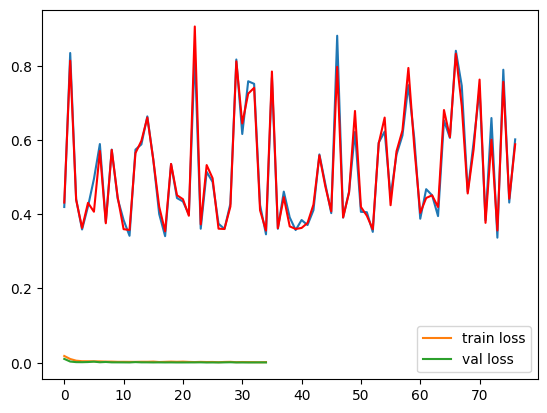

In [365]:
y_prid = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_prid, 'r')

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()